In [9]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
reader = easyocr.Reader(['es','en'])
im = cv2.imread("../data/invoice_examples/receipt.png")
result = reader.readtext(im)
print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[163, 19], [265, 19], [265, 79], [163, 79]], 'The -', 0.40150706916643825), ([[173, 111], [357, 111], [357, 149], [173, 149]], 'Store #100', 0.8023656104243206), ([[173, 151], [318, 151], [318, 193], [173, 193]], 'Chicago ,', 0.7912051781220548), ([[332, 154], [372, 154], [372, 184], [332, 184]], 'IL', 0.9995965942023682), ([[32, 300], [127, 300], [127, 337], [32, 337]], 'Large', 0.9999294145980976), ([[137, 301], [215, 301], [215, 339], [137, 339]], 'Eggs', 0.9997303485870361), ([[454, 300], [530, 300], [530, 332], [454, 332]], '0 .99', 0.9515062566497406), ([[32, 336], [110, 336], [110, 368], [32, 368]], 'Milk', 0.31698092818260193), ([[454, 338], [530, 338], [530, 370], [454, 370]], '1.15', 0.9965330958366394), ([[30, 372], [163, 372], [163, 412], [30, 412]], 'Cottage', 0.9990674525786762), ([[172, 374], [284, 374], [284, 406], [172, 406]], 'Cheese', 0.8929974698007425), ([[454, 374], [530, 374], [530, 406], [454, 406]], '0 . 59', 0.5234796755917488), ([[30, 408], [159, 408], [15

In [11]:
resFormat = ''
LastY = 0
Tolerance = 30
result.sort(key=lambda x: ((x[0][0][1]+x[0][2][1])//Tolerance, (x[0][0][0]+x[0][2][0])/2))

for r in result:
    text = r[1]
    YInitPos = r[0][0][1]

    if not ((LastY - Tolerance < YInitPos) and (LastY + Tolerance > YInitPos)):
        resFormat += "\r\n"
    resFormat += text + " "
    LastY = YInitPos
    cv2.rectangle(im, (int(r[0][0][0]), int(r[0][0][1])), (int(r[0][2][0]), int(r[0][2][1])), (0, 255, 0), 2)

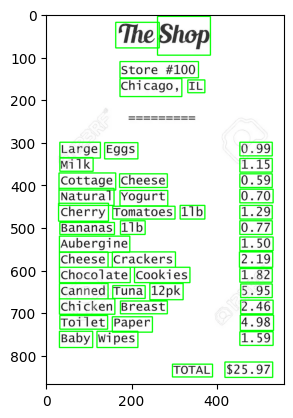

The - Shop 
Store #100 
Chicago , IL 
Large Eggs 0 .99 
Milk 1.15 
Cottage Cheese 0 . 59 
Natural Yogurt 0 . 70 
cherry 1lb 1.29 Tomatoes 
Bananas 17b 0 . 77 
Aubergine 1.50 
Cheese crackers 2 .19 
Chocolate Cookies 1.82 
Canned Tuna 12pk 5 .95 
Chicken Breast 2 .46 
Toilet Paper 4 .98 
Baby Wipes 1.59 
TOTAL $25 .97 


In [12]:
plt.imshow(im)
plt.show()
print(resFormat)